In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
import kagglehub
path = kagglehub.dataset_download("sulphatet/diabetes-130us-hospitals-for-years-19992008")

print("Path to dataset files:", path)

100%|██████████| 3.16M/3.16M [00:00<00:00, 3.65MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sulphatet/diabetes-130us-hospitals-for-years-19992008/versions/1


In [ ]:
df =  pd.read_csv(path + "/diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Getting to know the data

In [ ]:
df.shape

(101766, 50)

encounter_id: A unique identifier for each hospital encounter or admission.

patient_nbr: A unique identifier for each patient. Multiple encounter IDs may be associated with a single patient.

race: The race or ethnicity of the patient (e.g., White, African-American, Hispanic, etc.).

gender: The gender of the patient (e.g., Male, Female).

age: The age group of the patient, typically binned into ranges (e.g., [0-10], [10-20], [20-30]).

weight: The weight of the patient in pounds or kilograms. May have missing values if the weight was not recorded.

admission_type_id: A numerical code representing the type of admission (e.g., emergency, elective, newborn).

discharge_disposition_id: A numerical code indicating the patient's discharge status (e.g., discharged to home, transferred to another facility, died).

admission_source_id: A numerical code representing the source of the admission (e.g., referral from a physician, transfer from another hospital).

time_in_hospital: The number of days the patient stayed in the hospital.

payer_code: The type of insurance payer (e.g., Medicare, Medicaid, private insurance). May contain missing values.

medical_specialty: The medical specialty of the admitting doctor (e.g., cardiology, endocrinology, general surgery).

num_lab_procedures: The number of lab procedures performed during the encounter.

num_procedures: The number of other procedures (non-lab) performed during the encounter.

num_medications: The number of unique medications administered to the patient during the encounter.

number_outpatient: The number of outpatient visits the patient had before the encounter.

number_emergency: The number of emergency department visits the patient had prior to the encounter.

number_inpatient: The number of inpatient visits the patient had prior to the encounter.

diag_1: The primary diagnosis for the encounter, encoded as an ICD-9 code (International Classification of Diseases).

diag_2: The secondary diagnosis for the encounter, encoded as an ICD-9 code.

diag_3: The tertiary diagnosis for the encounter, encoded as an ICD-9 code.

number_diagnoses: The total number of diagnoses associated with the encounter.

max_glu_serum: Indicates the result of a glucose serum test. Values can include "None," ">200" (greater than 200 mg/dL), ">300" (greater than 300 mg/dL), or "Normal."

A1Cresult: Indicates the result of an A1C test, which measures blood sugar levels over the past few months. Values can include "None," ">7" (A1C above 7%), ">8" (A1C above 8%), or "Normal."

metformin: Indicates whether the patient was prescribed Metformin (a common diabetes medication). Possible values are "Up," "Down," "Steady," or "No" to indicate the medication change.

repaglinide: Indicates whether the patient was prescribed Repaglinide (another diabetes medication) with similar values as above.

nateglinide: Indicates whether the patient was prescribed Nateglinide (another diabetes medication) with similar values as above.

chlorpropamide: Indicates whether the patient was prescribed Chlorpropamide (another diabetes medication) with similar values as above.

glimepiride: Indicates whether the patient was prescribed Glimepiride (another diabetes medication) with similar values as above.

acetohexamide: Indicates whether the patient was prescribed Acetohexamide (another diabetes medication) with similar values as above.

glipizide: Indicates whether the patient was prescribed Glipizide (another diabetes medication) with similar values as above.

glyburide: Indicates whether the patient was prescribed Glyburide (another diabetes medication) with similar values as above.

tolbutamide: Indicates whether the patient was prescribed Tolbutamide (another diabetes medication) with similar values as above.

pioglitazone: Indicates whether the patient was prescribed Pioglitazone (another diabetes medication) with similar values as above.

rosiglitazone: Indicates whether the patient was prescribed Rosiglitazone (another diabetes medication) with similar values as above.

acarbose: Indicates whether the patient was prescribed Acarbose (another diabetes medication) with similar values as above.

miglitol: Indicates whether the patient was prescribed Miglitol (another diabetes medication) with similar values as above.

troglitazone: Indicates whether the patient was prescribed Troglitazone (another diabetes medication) with similar values as above.

tolazamide: Indicates whether the patient was prescribed Tolazamide (another diabetes medication) with similar values as above.

examide: This drug was not administered in this dataset (all values should be "No").

citoglipton: This drug was not administered in this dataset (all values should be "No").

insulin: Indicates whether the patient was prescribed insulin. Similar values as other medications (Up, Down, Steady, No).

glyburide-metformin: Indicates whether the patient was prescribed a combination of Glyburide and Metformin with similar values as above.

glipizide-metformin: Indicates whether the patient was prescribed a combination of Glipizide and Metformin with similar values as above.

glimepiride-pioglitazone: Indicates whether the patient was prescribed a combination of Glimepiride and Pioglitazone with similar values as above.

metformin-rosiglitazone: Indicates whether the patient was prescribed a combination of Metformin and Rosiglitazone with similar values as above.

metformin-pioglitazone: Indicates whether the patient was prescribed a combination of Metformin and Pioglitazone with similar values as above.

change: Indicates if there was a change in the diabetes medication (values: "Ch," "No").

diabetesMed: Indicates whether the patient was on diabetes medication during the encounter (Yes or No).

readmitted: Whether the patient was readmitted to the hospital within 30 days (values include "NO," "<30," and ">30").

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
df['age']

,age
0,[0-10)
1,[10-20)
2,[20-30)
3,[30-40)
4,[40-50)
...,...
101761,[70-80)
101762,[80-90)
101763,[70-80)
101764,[80-90)


In [ ]:
df['weight'].value_counts()

,count
weight,
?,98569
[75-100),1336
[50-75),897
[100-125),625
[125-150),145
[25-50),97
[0-25),48
[150-175),35
[175-200),11


In [ ]:
for col in df.columns:
   print(col, df[col].unique())

encounter_id [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id [6 1 2 3 4 5 8 7]
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedic

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:", categorical_columns)


Categorical columns: Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
# Identify categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Iterate over each categorical column and display the value counts
for col in categorical_columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("\n")  # Add a line break between columns for better readability


Value counts for column: race
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


Value counts for column: gender
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


Value counts for column: age
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


Value counts for column: weight
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64


Value counts for column: payer_code
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM  

The problem here is 3 of the value counts for gender is just 3


40000 of the payer_code values are jusst ?


50000 of the medical speciality value are ?


chlorpropamide no : 100000

acetohexamide no : 100000

tolbutamide  No 101743   Steady 23

troglitazone
No        101763
Steady         3

tolazamide
No        101727
Steady        38
Up             1

examide
No    101766

glipizide-metformin
No        101753
Steady        13

glipizide-metformin
No        101753
Steady        13


metformin-rosiglitazone
No        101764
Steady         2


Value counts for column: metformin-pioglitazone
metformin-pioglitazone
No        101765
Steady         1



In [ ]:
df['readmitted'].value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


# Pre Processing

In [ ]:
# Calculate the mode of the 'race' column in df_cleaned
race_mode = df['race'].mode()[0]

# Replace '?' with the mode in df_cleaned
df['race'] = df['race'].replace('?', race_mode)

# Verify the replacement
print(df['race'].value_counts())


race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


In [ ]:
# Calculate the mode of the 'gender' column in df_cleaned
gender_mode = df['gender'].mode()[0]

# Replace 'Unknown/Invalid' with the mode in df_cleaned
df['gender'] = df['gender'].replace('Unknown/Invalid', gender_mode)

# Verify the replacement
print(df['gender'].value_counts())


gender
Female    54711
Male      47055
Name: count, dtype: int64


In [ ]:

# Function to convert age ranges to midpoints
def age_to_midpoint(age_range):
    if age_range == '[0-10)':
        return 5
    elif age_range == '[10-20)':
        return 15
    elif age_range == '[20-30)':
        return 25
    elif age_range == '[30-40)':
        return 35
    elif age_range == '[40-50)':
        return 45
    elif age_range == '[50-60)':
        return 55
    elif age_range == '[60-70)':
        return 65
    elif age_range == '[70-80)':
        return 75
    elif age_range == '[80-90)':
        return 85
    elif age_range == '[90-100)':
        return 95

# Apply the function to create a new column with midpoints
df['age'] = df['age'].apply(age_to_midpoint)

# Display the first few rows of the updated DataFrame
print(df['age'].nunique)


<bound method IndexOpsMixin.nunique of 0          5
1         15
2         25
3         35
4         45
          ..
101761    75
101762    85
101763    75
101764    85
101765    75
Name: age, Length: 101766, dtype: int64>


In [ ]:
# Calculate the mode of the 'diag_1' column
diag_1_mode = df['diag_1'].mode()[0]

# Replace non-numeric values in the 'diag_1' column with the mode
df['diag_1'] = df['diag_1'].apply(lambda x: diag_1_mode if isinstance(x, str) and not x.isnumeric() else x)

# Convert the column to numeric type, forcing errors to NaN (optional)
df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce')

# Verify the type and the value counts
print(df['diag_1'].dtypes)  # Check the type of the column
print(df['diag_1'].value_counts())  # Check the value counts



int64
diag_1
428    17050
414     6581
786     4016
410     3614
486     3508
       ...  
114        1
833        1
391        1
690        1
10         1
Name: count, Length: 664, dtype: int64


In [ ]:

# Calculate the mode of the 'diag_1' column
diag_2_mode = df['diag_2'].mode()[0]

# Replace non-numeric values in the 'diag_1' column with the mode
df['diag_2'] = df['diag_2'].apply(lambda x: diag_2_mode if isinstance(x, str) and not x.isnumeric() else x)

# Convert the column to numeric type, forcing errors to NaN (optional)
df['diag_2'] = pd.to_numeric(df['diag_2'], errors='coerce')

# Verify the type and the value counts
print(df['diag_2'].dtypes)  # Check the type of the column
print(df['diag_2'].value_counts())  # Check the value counts



int64
diag_2
276    16369
428     6662
250     6071
427     5036
401     3736
       ...  
66         1
123        1
884        1
843        1
927        1
Name: count, Length: 617, dtype: int64


In [ ]:
diag_3_mode = df['diag_3'].mode()[0]

# Replace non-numeric values in the 'diag_1' column with the mode
df['diag_3'] = df['diag_3'].apply(lambda x: diag_3_mode if isinstance(x, str) and not x.isnumeric() else x)

# Convert the column to numeric type, forcing errors to NaN (optional)
df['diag_3'] = pd.to_numeric(df['diag_3'], errors='coerce')

# Verify the type and the value counts
print(df['diag_3'].dtypes)  # Check the type of the column
print(df['diag_3'].value_counts())  # Check the value counts

int64
diag_3
250    23639
401     8289
276     5175
428     4577
427     3955
       ...  
755        1
361        1
370        1
671        1
971        1
Name: count, Length: 638, dtype: int64


In [ ]:
df['age'].value_counts()

,count
age,
75,26068
65,22483
55,17256
85,17197
45,9685
35,3775
95,2793
25,1657
15,691


In [ ]:

# Separate features and target
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Manually define categorical columns (or use the method below if you want to check them)
X_cat = X.select_dtypes(include=['object'])

# Apply LabelEncoder to transform categorical features into numerical format
label_encoders = {}
for col in X_cat.columns:
    le = LabelEncoder()
    X_cat[col] = le.fit_transform(X_cat[col].astype(str))  # Transform categorical columns to numerical values
    label_encoders[col] = le

# Use SelectKBest with Chi-Square to select the 20 best categorical features
chi2_selector = SelectKBest(chi2, k=20)
X_kbest_chi2 = chi2_selector.fit_transform(X_cat, y)

# Get the scores of the selected features
chi_scores = pd.DataFrame({
    'Feature': X_cat.columns[chi2_selector.get_support()],  # Corrected reference to X_cat.columns
    'Chi2 Stat': chi2_selector.scores_[chi2_selector.get_support()]
})

# Sort features by Chi2 Stat
chi_scores = chi_scores.sort_values(by='Chi2 Stat', ascending=False)
print("Top 20 categorical features selected using Chi-Square:\n", chi_scores)



Top 20 categorical features selected using Chi-Square:
                      Feature    Chi2 Stat
3          medical_specialty  6697.550690
1                     weight   223.535674
2                 payer_code   111.988335
18                    change    99.700776
19               diabetesMed    88.885426
0                     gender    18.710642
6                  metformin    15.680687
5                  A1Cresult     8.326607
8                  glipizide     3.406416
14       glipizide-metformin     2.047730
13                tolazamide     2.024206
7              acetohexamide     1.863019
15  glimepiride-pioglitazone     1.863019
16   metformin-rosiglitazone     1.709755
10              pioglitazone     1.642029
9                tolbutamide     1.634609
4              max_glu_serum     1.518799
11             rosiglitazone     1.507989
12              troglitazone     1.435651
17    metformin-pioglitazone     0.854878


Drops all the unneccesary categorical features


In [ ]:

columns_to_drop = ['citoglipton', 'weight',
    'max_glu_serum','A1Cresult',
'chlorpropamide' ,
'acetohexamide' ,
'tolbutamide' ,
'troglitazone' ,
'tolazamide' ,
'examide' ,
'glipizide-metformin' ,
'glipizide-metformin' ,
'metformin-rosiglitazone','metformin-pioglitazone']

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame
df_cleaned.head()


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,glimepiride-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,3,?,...,No,No,No,No,Up,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,?,...,No,No,No,No,Up,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,?,...,No,No,No,No,Steady,No,No,Ch,Yes,NO


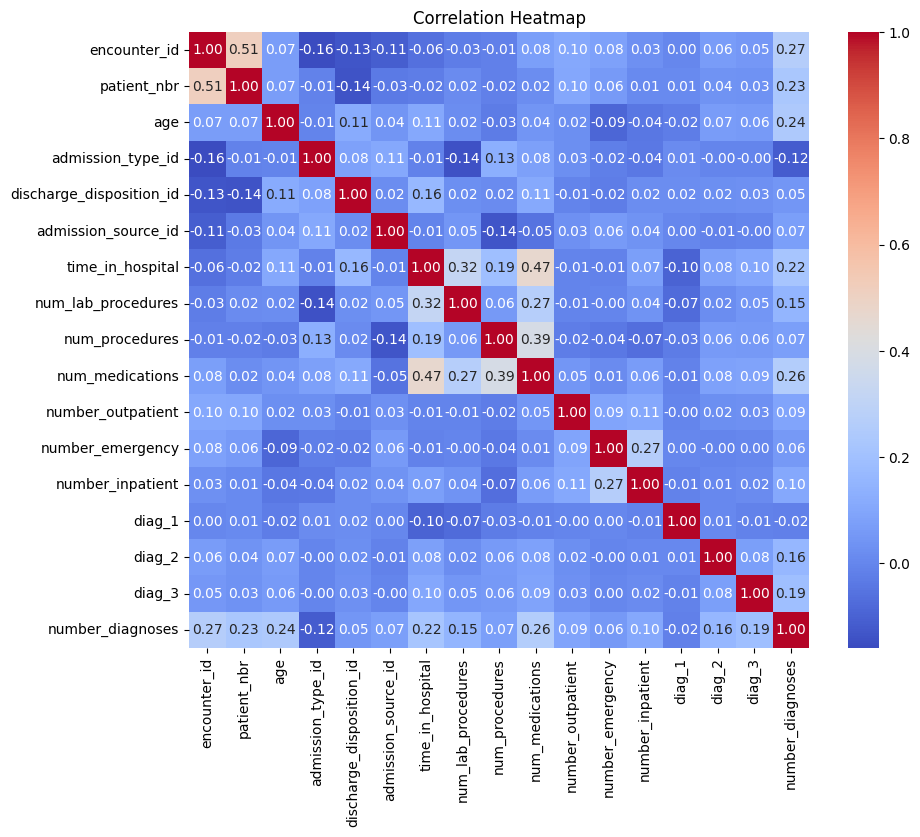

In [ ]:
numeric_df = df_cleaned.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


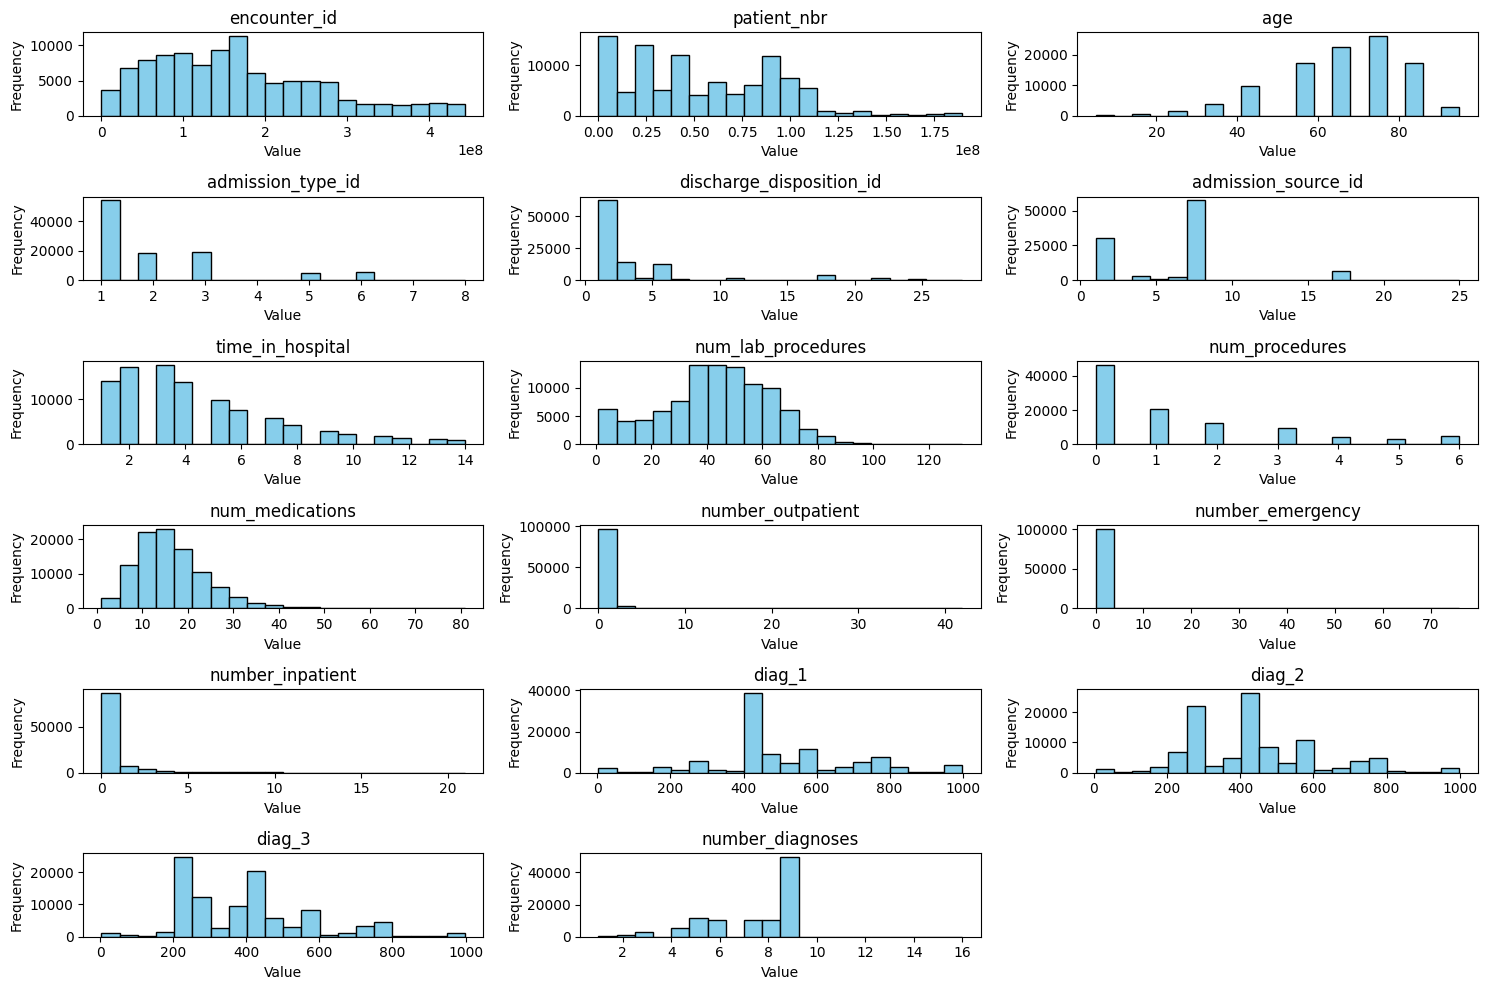

In [ ]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Create histograms for each numeric column
plt.figure(figsize=(15, 10))  # Adjust figure size for clarity
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(len(numeric_df.columns) // 3 + 1, 3, i)
    plt.hist(numeric_df[column].dropna(), bins=20, color='skyblue', edgecolor='black')  # Customize bins and color
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


remove numerical features


In [ ]:
from scipy.stats import f_oneway

# Assuming a target variable named 'target' with categories
for column in numeric_df.columns:
    groups = [numeric_df[column][df_cleaned['readmitted'] == value].dropna() for value in df_cleaned['readmitted'].unique()]
    stat, p_value = f_oneway(*groups)
    print(f"{column}: p-value = {p_value}")


encounter_id: p-value = 4.327413514034769e-34
patient_nbr: p-value = 2.502753844700328e-133
age: p-value = 4.341431521898956e-22
admission_type_id: p-value = 0.0009875508681501468
discharge_disposition_id: p-value = 9.61053979602741e-88
admission_source_id: p-value = 1.9710559950030391e-38
time_in_hospital: p-value = 1.411815390386835e-74
num_lab_procedures: p-value = 1.557243276756841e-35
num_procedures: p-value = 1.1975406517965434e-45
num_medications: p-value = 4.900463977647552e-60
number_outpatient: p-value = 1.82159082912971e-154
number_emergency: p-value = 2.688984098469832e-248
number_inpatient: p-value = 0.0
diag_1: p-value = 0.0003410736806387943
diag_2: p-value = 0.06233444599249883
diag_3: p-value = 2.807904005298112e-17
number_diagnoses: p-value = 1.422802215865904e-283


In [ ]:
col_to_drop = ['diag_2']
df_cleaned = df_cleaned.drop(col_to_drop, axis=1)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  int64 
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_encoded = df_cleaned.copy()
label_encoders = {}

for column in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Separate features and target
X = df_encoded.drop(columns=["readmitted"])  # 'readmitted' is the target variable
y = df_encoded["readmitted"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Scale numerical columns in the resampled training set
scaler = MinMaxScaler()
X_resampled_scaled = pd.DataFrame(X_resampled, columns=X.columns)
X_resampled_scaled[numerical_cols] = scaler.fit_transform(X_resampled_scaled[numerical_cols])

# Convert X_test back to DataFrame and scale its numerical columns
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_scaled = X_test_df.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Print shapes to verify
print("Scaled resampled training data shape:", X_resampled_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)


Scaled resampled training data shape: (115215, 35)
Scaled test data shape: (30530, 35)


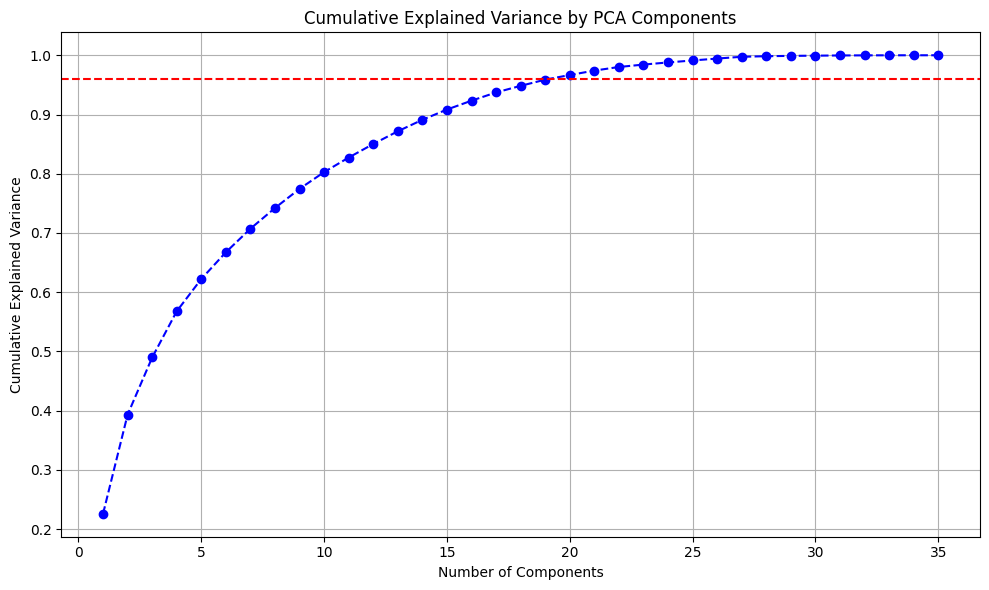

In [ ]:
pca = PCA()
pca.fit(X_resampled_scaled)

# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.96, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Select the number of components based on 95% variance threshold
n_components = sum(cumulative_variance < 0.96) + 1
print(f"Optimal number of components based on 96% variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


Optimal number of components based on 96% variance: 20


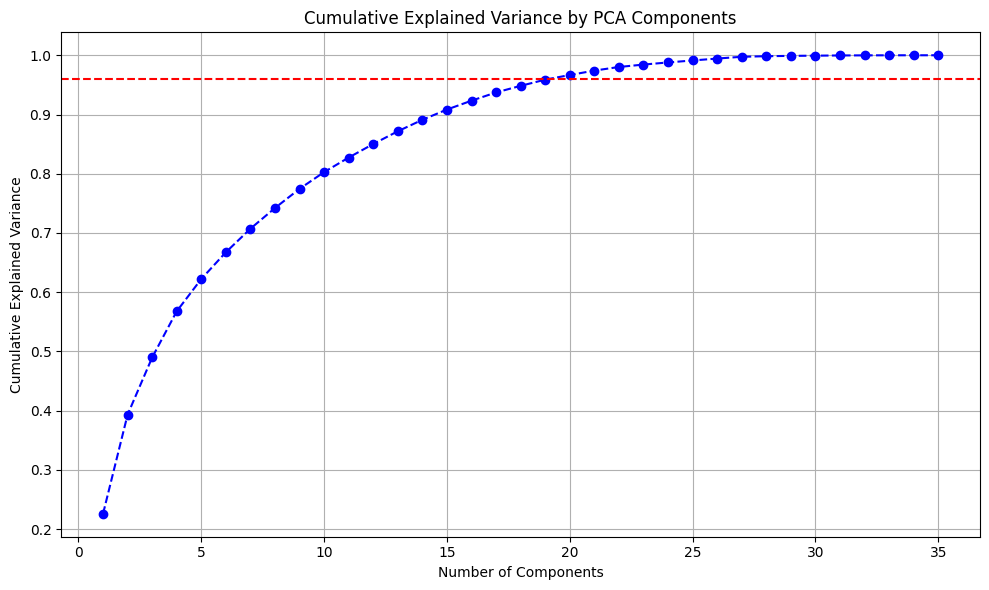

Optimal number of components based on 96% variance: 20


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Label encode categorical variables
df_encoded = df_cleaned.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 2: Separate features and target
X = df_encoded.drop(columns=["readmitted"])
y = df_encoded["readmitted"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Apply SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Identify numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 6: Scale numerical columns
scaler = MinMaxScaler()

# Resampled training data
X_resampled_scaled = pd.DataFrame(X_resampled, columns=X.columns)
X_resampled_scaled[numerical_cols] = scaler.fit_transform(X_resampled_scaled[numerical_cols])

# Test data
X_test_scaled = pd.DataFrame(X_test, columns=X.columns)
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Step 7: PCA fitting on scaled resampled data
pca = PCA()
pca.fit(X_resampled_scaled)

# Step 8: Plot cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.96, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Select optimal number of components
n_components = sum(cumulative_variance < 0.96) + 1
print(f"Optimal number of components based on 96% variance: {n_components}")

# Step 10: Apply PCA with selected components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_resampled_scaled)
X_test_pca = pca.transform(X_test_scaled)


Cross-Validation Scores: [0.43761663 0.63112442 0.63346786 0.62869418 0.60855791]
Mean CV Score: 0.5879 (+/- 0.1513)
Test Accuracy: 0.5165

Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.12      0.13      3407
           1       0.44      0.38      0.41     10664
           2       0.60      0.69      0.64     16459

    accuracy                           0.52     30530
   macro avg       0.40      0.40      0.40     30530
weighted avg       0.50      0.52      0.50     30530



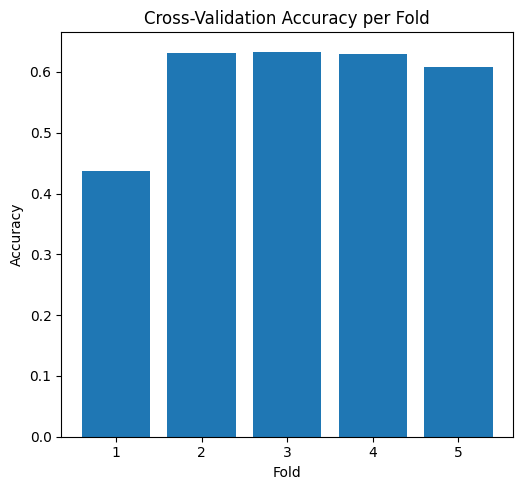

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def evaluate_model(X_train_pca, y_train, X_test_pca, y_test):
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

    # 5-fold CV
    cv_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5, scoring='accuracy')

    # Train and predict
    rf_model.fit(X_train_pca, y_train)
    y_test_pred = rf_model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Results
    print("Cross-Validation Scores:", cv_scores)
    print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Plot CV results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(cv_scores) + 1), cv_scores)
    plt.title('Cross-Validation Accuracy per Fold')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

    return rf_model

# Call with your transformed data
model = evaluate_model(X_train_pca, y_resampled, X_test_pca, y_test)


Cross-Validation Results:

Accuracy:
Validation Scores: [0.60959944 0.60404461 0.60764657 0.60799375 0.60708241]
Validation Mean: 0.6073 (+/- 0.0036)

Precision_macro:
Validation Scores: [0.6047289  0.59880683 0.6027809  0.60327108 0.60141751]
Validation Mean: 0.6022 (+/- 0.0040)

Recall_macro:
Validation Scores: [0.60959944 0.60404461 0.60764657 0.60799375 0.60708241]
Validation Mean: 0.6073 (+/- 0.0036)

F1_macro:
Validation Scores: [0.60221197 0.59688656 0.60018496 0.60060876 0.59931172]
Validation Mean: 0.5998 (+/- 0.0035)

Test Set Performance:
Test Accuracy: 0.5165
Test Precision: 0.4969
Test Recall: 0.5165
Test F1-Score: 0.5040


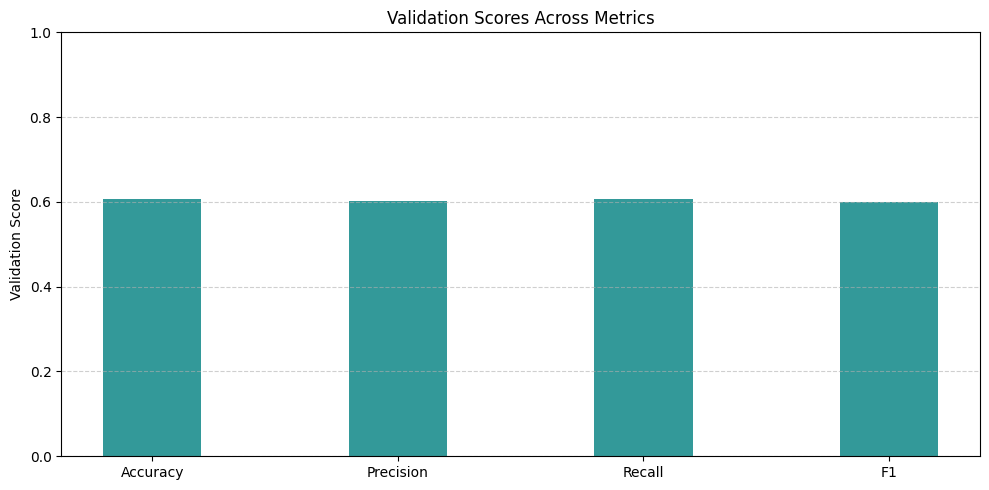

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

# Evaluation function for SMOTE + PCA-transformed data
def evaluate_model_on_sampled_pca(X_train_pca, y_resampled, X_test_pca, y_test):
    def precision_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[0]

    def recall_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[1]

    def f1_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[2]

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision_macro': make_scorer(precision_macro),
        'recall_macro': make_scorer(recall_macro),
        'f1_macro': make_scorer(f1_macro)
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'
    )

    cv_results = cross_validate(
        rf_model,
        X_train_pca,
        y_resampled,
        cv=cv,
        scoring=scoring,
        return_train_score=True
    )

    print("Cross-Validation Results:")
    for metric in scoring.keys():
        test_scores = cv_results[f'test_{metric}']
        print(f"\n{metric.capitalize()}:")
        print(f"Validation Scores: {test_scores}")
        print(f"Validation Mean: {test_scores.mean():.4f} (+/- {test_scores.std() * 2:.4f})")

    # Train on full PCA resampled training data
    rf_model.fit(X_train_pca, y_resampled)
    y_test_pred = rf_model.predict(X_test_pca)

    print("\nTest Set Performance:")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1-Score: {f1:.4f}")

    # Plotting validation results
    plt.figure(figsize=(10, 5))
    metrics = list(scoring.keys())
    val_means = [cv_results[f'test_{metric}'].mean() for metric in metrics]

    x = np.arange(len(metrics))
    plt.bar(x, val_means, width=0.4, color='teal', alpha=0.8)
    plt.xticks(x, [m.replace('_macro', '').capitalize() for m in metrics])
    plt.ylabel('Validation Score')
    plt.title('Validation Scores Across Metrics')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return rf_model

# Run evaluation
model = evaluate_model_on_sampled_pca(X_train_pca, y_resampled, X_test_pca, y_test)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the test labels for ROC-AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_resampled))

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_pca, y_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_pca)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_pca)

# Classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC Score (Macro)
roc_auc_xgb = roc_auc_score(y_test_binarized, y_pred_proba_xgb, average="macro", multi_class="ovr")
print(f"Macro ROC-AUC Score (XGBoost): {roc_auc_xgb:.2f}")


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.15      0.16      0.16      3407
           1       0.46      0.40      0.43     10664
           2       0.61      0.66      0.63     16459

    accuracy                           0.51     30530
   macro avg       0.41      0.40      0.40     30530
weighted avg       0.51      0.51      0.51     30530

Macro ROC-AUC Score (XGBoost): 0.60


Cross-Validation Results (XGBoost):

Accuracy:
Validation Scores: [0.56620232 0.56138524 0.56598533 0.56012672 0.56216638]
Validation Mean: 0.5632 (+/- 0.0049)

Precision_macro:
Validation Scores: [0.55808015 0.55367181 0.55830388 0.55180912 0.55370183]
Validation Mean: 0.5551 (+/- 0.0052)

Recall_macro:
Validation Scores: [0.56620232 0.56138524 0.56598533 0.56012672 0.56216638]
Validation Mean: 0.5632 (+/- 0.0049)

F1_macro:
Validation Scores: [0.55867812 0.5540855  0.55829822 0.55205735 0.55401758]
Validation Mean: 0.5554 (+/- 0.0052)

Test Set Performance (XGBoost):
Test Accuracy: 0.5103
Test Precision: 0.5067
Test Recall: 0.5103
Test F1-Score: 0.5073


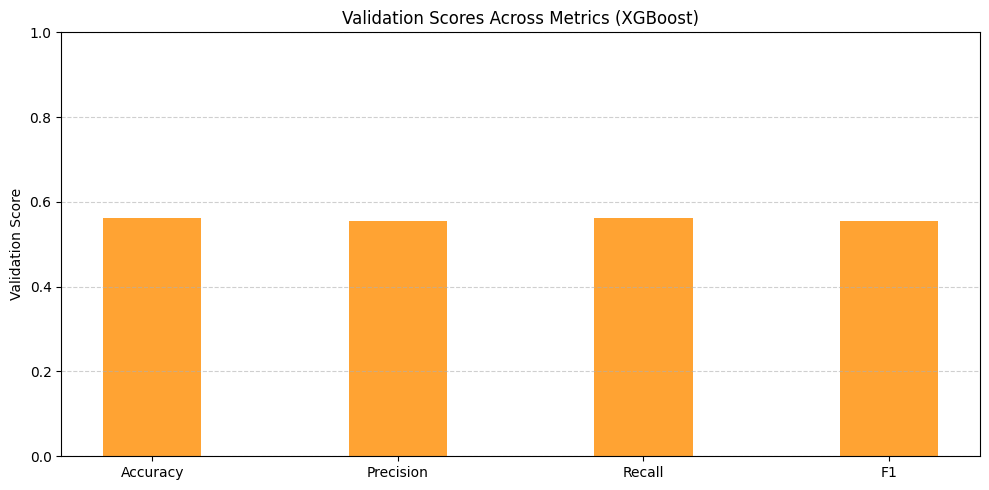

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Evaluation function for XGBoost on SMOTE + PCA-transformed data
def evaluate_xgboost_on_sampled_pca(X_train_pca, y_resampled, X_test_pca, y_test):
    def precision_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[0]

    def recall_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[1]

    def f1_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[2]

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision_macro': make_scorer(precision_macro),
        'recall_macro': make_scorer(recall_macro),
        'f1_macro': make_scorer(f1_macro)
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    xgb_model = XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

    cv_results = cross_validate(
        xgb_model,
        X_train_pca,
        y_resampled,
        cv=cv,
        scoring=scoring,
        return_train_score=True
    )

    print("Cross-Validation Results (XGBoost):")
    for metric in scoring.keys():
        test_scores = cv_results[f'test_{metric}']
        print(f"\n{metric.capitalize()}:")
        print(f"Validation Scores: {test_scores}")
        print(f"Validation Mean: {test_scores.mean():.4f} (+/- {test_scores.std() * 2:.4f})")

    # Train on full training set and evaluate on test set
    xgb_model.fit(X_train_pca, y_resampled)
    y_test_pred = xgb_model.predict(X_test_pca)

    print("\nTest Set Performance (XGBoost):")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1-Score: {f1:.4f}")

    # Plotting validation results
    plt.figure(figsize=(10, 5))
    metrics = list(scoring.keys())
    val_means = [cv_results[f'test_{metric}'].mean() for metric in metrics]

    x = np.arange(len(metrics))
    plt.bar(x, val_means, width=0.4, color='darkorange', alpha=0.8)
    plt.xticks(x, [m.replace('_macro', '').capitalize() for m in metrics])
    plt.ylabel('Validation Score')
    plt.title('Validation Scores Across Metrics (XGBoost)')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return xgb_model

# Run evaluation
xgb_model = evaluate_xgboost_on_sampled_pca(X_train_pca, y_resampled, X_test_pca, y_test)


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the test labels for ROC-AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_resampled))

# Define base models
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
]

# Define the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

# Train the stacking model
stacking_model.fit(X_train_pca, y_resampled)

# Make predictions
y_pred_stack = stacking_model.predict(X_test_pca)
y_pred_proba_stack = stacking_model.predict_proba(X_test_pca)

# Classification report
print("Classification Report (Stacking):")
print(classification_report(y_test, y_pred_stack))

# ROC-AUC Score (Macro)
roc_auc_stack = roc_auc_score(y_test_binarized, y_pred_proba_stack, average="macro", multi_class="ovr")
print(f"Macro ROC-AUC Score (Stacking): {roc_auc_stack:.2f}")


Classification Report (Stacking):
              precision    recall  f1-score   support

           0       0.15      0.08      0.10      3407
           1       0.43      0.43      0.43     10664
           2       0.61      0.67      0.63     16459

    accuracy                           0.52     30530
   macro avg       0.40      0.39      0.39     30530
weighted avg       0.49      0.52      0.50     30530

Macro ROC-AUC Score (Stacking): 0.59


Cross-Validation Results (StackingClassifier):

Accuracy:
Validation Scores: [0.61615241 0.61042399 0.61706375 0.61285423 0.61051078]
Validation Mean: 0.6134 (+/- 0.0055)

Precision_macro:
Validation Scores: [0.61851192 0.6134828  0.61970739 0.61496066 0.61260994]
Validation Mean: 0.6159 (+/- 0.0056)

Recall_macro:
Validation Scores: [0.61615241 0.61042399 0.61706375 0.61285423 0.61051078]
Validation Mean: 0.6134 (+/- 0.0055)

F1_macro:
Validation Scores: [0.61607351 0.61055789 0.61704124 0.61246287 0.61018896]
Validation Mean: 0.6133 (+/- 0.0056)

Test Set Performance (StackingClassifier):
Test Accuracy: 0.5185
Test Precision: 0.4944
Test Recall: 0.5185
Test F1-Score: 0.5044


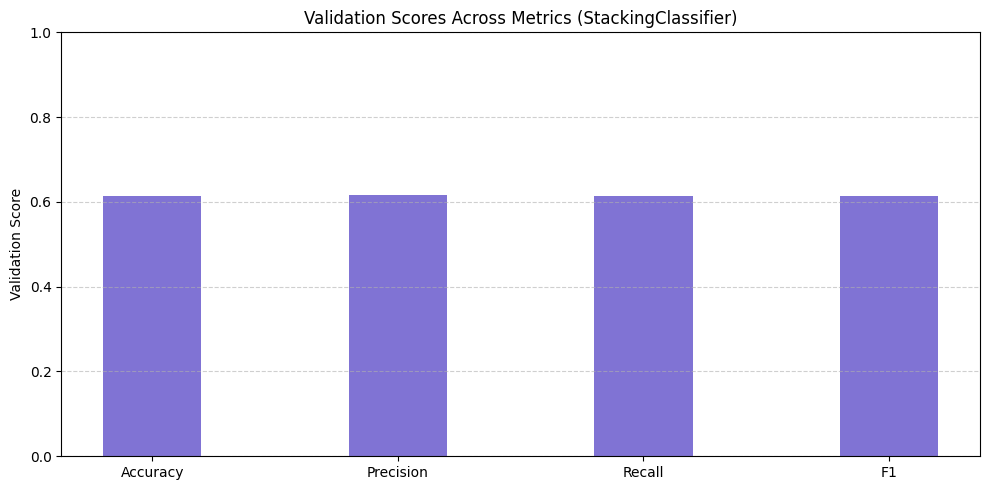

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Evaluation function for StackingClassifier on SMOTE + PCA-transformed data
def evaluate_stacking_on_sampled_pca(X_train_pca, y_resampled, X_test_pca, y_test):
    def precision_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[0]

    def recall_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[1]

    def f1_macro(y_true, y_pred):
        return precision_recall_fscore_support(y_true, y_pred, average='macro')[2]

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision_macro': make_scorer(precision_macro),
        'recall_macro': make_scorer(recall_macro),
        'f1_macro': make_scorer(f1_macro)
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define base learners and meta learner
    base_learners = [
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
    ]

    stacking_model = StackingClassifier(
        estimators=base_learners,
        final_estimator=LogisticRegression(max_iter=1000, random_state=42)
    )

    cv_results = cross_validate(
        stacking_model,
        X_train_pca,
        y_resampled,
        cv=cv,
        scoring=scoring,
        return_train_score=True
    )

    print("Cross-Validation Results (StackingClassifier):")
    for metric in scoring.keys():
        test_scores = cv_results[f'test_{metric}']
        print(f"\n{metric.capitalize()}:")
        print(f"Validation Scores: {test_scores}")
        print(f"Validation Mean: {test_scores.mean():.4f} (+/- {test_scores.std() * 2:.4f})")

    # Train on full PCA resampled training data
    stacking_model.fit(X_train_pca, y_resampled)
    y_test_pred = stacking_model.predict(X_test_pca)

    print("\nTest Set Performance (StackingClassifier):")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1-Score: {f1:.4f}")

    # Plotting validation results
    plt.figure(figsize=(10, 5))
    metrics = list(scoring.keys())
    val_means = [cv_results[f'test_{metric}'].mean() for metric in metrics]

    x = np.arange(len(metrics))
    plt.bar(x, val_means, width=0.4, color='slateblue', alpha=0.85)
    plt.xticks(x, [m.replace('_macro', '').capitalize() for m in metrics])
    plt.ylabel('Validation Score')
    plt.title('Validation Scores Across Metrics (StackingClassifier)')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return stacking_model

# Run evaluation
stack_model = evaluate_stacking_on_sampled_pca(X_train_pca, y_resampled, X_test_pca, y_test)
